In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cpath='../content/Data/Charge/B0005.csv'
dpath='../content/Data/Discharge/B0005.csv'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import zipfile

In [0]:
zipref=zipfile.ZipFile('../content/drive/My Drive/Data.zip')
zipref.extractall()
zipref.close()

In [0]:
df2=pd.read_csv(dpath)

In [104]:
df2.Date[0]

'02 Apr 2008, 15:25:41'

In [0]:
df2.Date=pd.to_datetime(df2.Date)

In [0]:
df2=df2.set_index('Date')

In [107]:
df2.dtypes

Unnamed: 0           int64
current_battery    float64
current_load       float64
temp_battery       float64
time               float64
volatge_battery    float64
volatge_load       float64
Cycle                int64
dtype: object

In [109]:
df2.index

DatetimeIndex(['2008-04-02 15:25:41', '2008-04-02 15:25:41',
               '2008-04-02 15:25:41', '2008-04-02 15:25:41',
               '2008-04-02 15:25:41', '2008-04-02 15:25:41',
               '2008-04-02 15:25:41', '2008-04-02 15:25:41',
               '2008-04-02 15:25:41', '2008-04-02 15:25:41',
               ...
               '2008-05-27 15:52:41', '2008-05-27 15:52:41',
               '2008-05-27 15:52:41', '2008-05-27 15:52:41',
               '2008-05-27 15:52:41', '2008-05-27 15:52:41',
               '2008-05-27 15:52:41', '2008-05-27 15:52:41',
               '2008-05-27 15:52:41', '2008-05-27 15:52:41'],
              dtype='datetime64[ns]', name='Date', length=49985, freq=None)

In [0]:
df2=df2.drop('Unnamed: 0',axis=1)

In [111]:
df2.head()

,current_battery,current_load,temp_battery,time,volatge_battery,volatge_load,Cycle
Date,,,,,,,
2008-04-02 15:25:41,-0.004902,-0.0006,24.330034,0.000,4.191492,0.000,1
2008-04-02 15:25:41,-0.001478,-0.0006,24.325993,16.781,4.190749,4.206,1
2008-04-02 15:25:41,-2.012528,-1.9982,24.389085,35.703,3.974871,3.062,1
2008-04-02 15:25:41,-2.013979,-1.9982,24.544752,53.781,3.951717,3.030,1
2008-04-02 15:25:41,-2.011144,-1.9982,24.731385,71.922,3.934352,3.011,1


In [0]:
sns.set(rc={'figure.figsize':(11,4)})

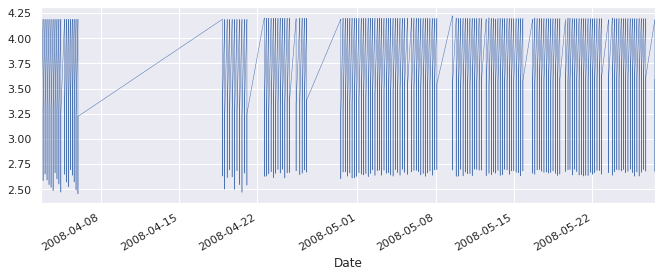

In [115]:
df2.volatge_battery.plot(linewidth=0.5)

OUTLIER at 22-04-2008

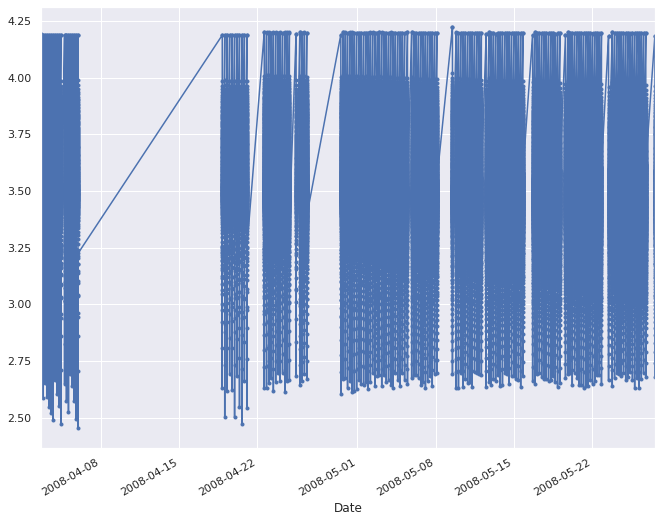

In [120]:
cols=['current_battery','current_load','temp_battery','time','volatge_battery','volatge_load']
axes=df2['volatge_battery'].plot(marker='.',alpha=1.0,figsize=(11,9),subplots=True)


In [140]:
df2[x='Cycle',y='volatge_load'].plot()

SyntaxError: ignored

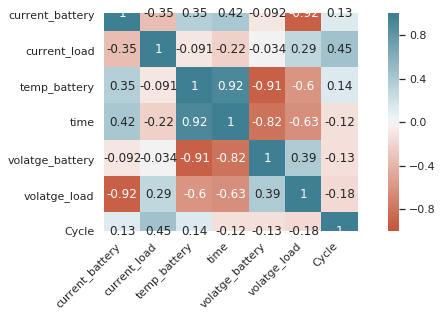

In [121]:
corr=df2.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Heightest correlation feature-: Temp Battery


In [0]:
df4=df2.drop('temp_battery',axis=1)

In [123]:
df4.dtypes

current_battery    float64
current_load       float64
time               float64
volatge_battery    float64
volatge_load       float64
Cycle                int64
dtype: object

Correlation Matrix after dropping the highest feature

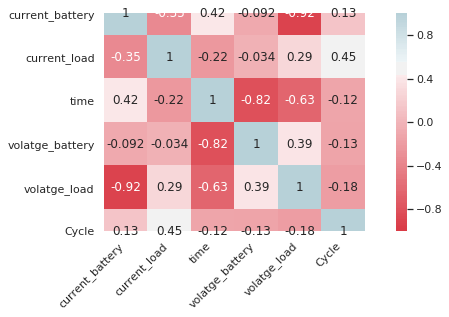

In [124]:
corr=df4.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0.5, cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

RESAMPLING

In [0]:
cols=['current_battery','current_load','temp_battery','time','volatge_battery','volatge_load']

In [0]:
df_mean=df2[cols].resample('10S').mean()

In [128]:
df_mean[df_mean['time']!='NaN']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,current_battery,current_load,temp_battery,time,volatge_battery,volatge_load
Date,,,,,,
2008-04-02 15:25:40,-1.818702,-1.80557,32.572328,1812.087497,3.529829,2.404944
2008-04-02 15:25:50,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 15:26:00,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 15:26:10,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02 15:26:20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-05-27 15:52:00,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27 15:52:10,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27 15:52:20,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
len(df_mean)

475363

In [130]:
df2.dtypes

current_battery    float64
current_load       float64
temp_battery       float64
time               float64
volatge_battery    float64
volatge_load       float64
Cycle                int64
dtype: object

ANOMALY DETECTION

In [145]:
df2.describe()

,current_battery,current_load,temp_battery,time,volatge_battery,volatge_load,Cycle
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.00000
mean,-1.806681,1.360764,32.810699,1547.068009,3.515506,2.309535,304.53388
std,0.609646,1.316195,3.986553,907.100118,0.231734,0.799314,173.26304
min,-2.029098,-1.998400,23.214802,0.000000,2.455679,0.000000,1.00000
25%,-2.013412,1.998000,30.015929,768.656000,3.399632,2.388000,157.00000
50%,-2.012310,1.998200,32.820560,1537.109000,3.511811,2.534000,301.00000
75%,-2.011050,1.998200,35.914100,2307.094000,3.661144,2.691000,452.00000
max,0.007496,1.998400,41.450232,3690.234000,4.222920,4.238000,611.00000


No Anomaly being detected in the discharge phase

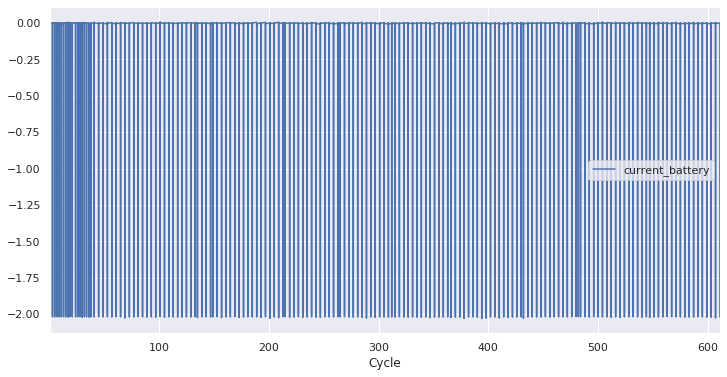

In [148]:
df2.plot(x='Cycle', y='current_battery', figsize=(12,6))




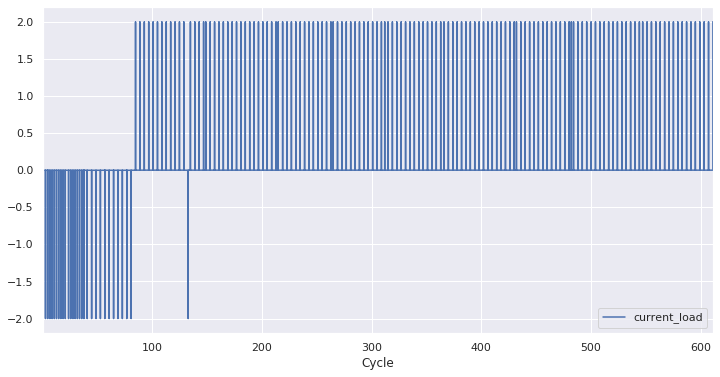

In [149]:
df2.plot(x='Cycle', y='current_load', figsize=(12,6))

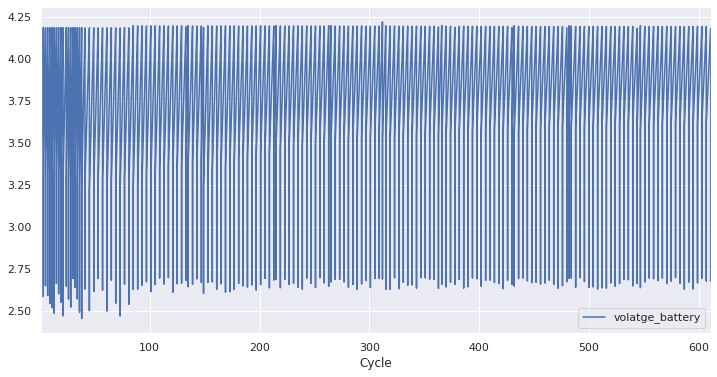

In [150]:
df2.plot(x='Cycle', y='volatge_battery', figsize=(12,6))

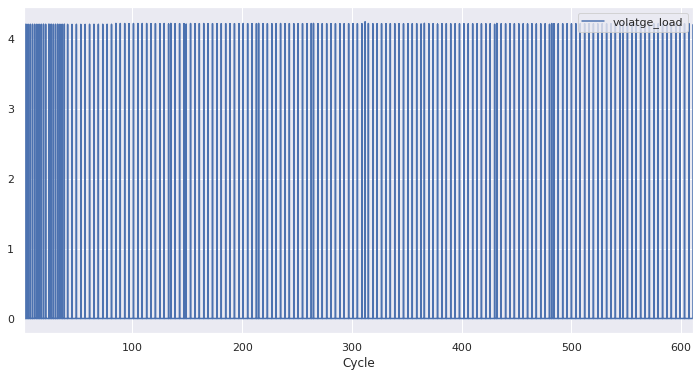

In [151]:
df2.plot(x='Cycle', y='volatge_load', figsize=(12,6))

But we see a Trend change while plotting the graph for Current_load


In [0]:
df3=df2[df2.Cycle<=82]
df4=df2[df2.Cycle>82]
a=df4[df4.current_load<0]

We see trend changing from cycle 80 with Current Load becomes positive excpt for Cycle 133 which we take as an anomaly as it goes away from the trend and shows a negative current load

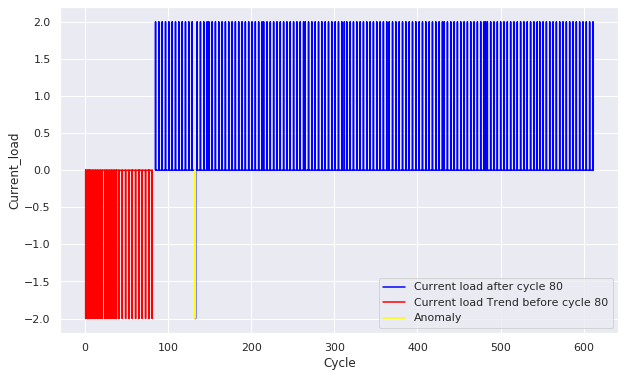

In [175]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df4['Cycle'],df4['current_load'], color='blue', label='Current load after cycle 80')
ax.plot(df3['Cycle'],df3['current_load'], color='red', label='Current load Trend before cycle 80')
ax.plot(a['Cycle'],a['current_load'], color='yellow', label='Anomaly')
plt.xlabel('Cycle')
plt.ylabel('Current_load')
plt.legend()
plt.show();